# **<center> Análisis de Sentimientos de los candidatos presidenciales </br> Ecuador 2021, en la red social Twitter </center>**
<h6>
    <center> Miguel Angel Macias, Jonnathan Campoberde <br/> 
    <i>Universidad de Cuenca <br/>  <i>Facultad de Ingenieria - Escuela de Sistemas<br/> Cuenca, Ecuador</i>
    <br/> { mangel.maciasn, jonnathan.campoberde }@ucuenca.edu.ec</center>
<h6>

# **I.&emsp;Introducción**
El presente trabajo tiene como objetivo emplear de manera práctica todos los conocimientos adquiridos en el transcurso de la asignatura “Text Mining”. Se trabajará con un dataset... . Se busca analizar el ..., detectando las ... por medio de ... . Todo esto con el propósito de ... .

## **1.1.&emsp;Objetivos del Proyecto**
>El objetivo del proyecto es el Análisis de Sentimientos de los candidatos presidenciales de Ecuador 2021, para luego contrastar los resultados obtenidos con los resultados oficiales de las elecciones Posteriormente se desea responder a las preguntas definidas en 1.2.

## **1.2.&emsp;Preguntas de investigación**
>- RQ1:     ¿Qué tan precisamente los datos de Twitter reflejan el sentimiento político en un proceso electoral?
>- RQ1:     ¿En qué grado de aceptación se encuentran los candidatos dentro de la red Social Twitter?
>- RQ3:     ¿Los resultadso oficiales son parecidos a los hallados en nuestro análisis?


# **IV.&emsp;SENTIMENT ANALYSIS**

## **4.1.&emsp; Reading dataset**
>Para este paso...

In [23]:
import warnings
warnings.filterwarnings("ignore")
import pytz

import numpy as np              # Para operaciones matematicas
import pandas as pd             # Manejo de datos / dataframes
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


#%matplotlib inline

In [2]:
data_raw = '../data/raw'              # directorio que contiene toda la data sin manipular
data_processed = '../data/processed'  # directorio que contiene data procesada

In [3]:
df_arauz_tag = pd.read_csv(data_processed+"/arauz_tag.csv")
df_arauz_tag['created_at'] = pd.to_datetime(df_arauz_tag['created_at'], utc=pytz.UTC)
df_arauz_tag['user.created_at'] = pd.to_datetime(df_arauz_tag['user.created_at'], utc=pytz.UTC)
df_arauz_tag

,created_at,favorite_count,full_text,id_str,metadata.iso_language_code,retweeted_status.created_at,retweeted_status.full_text,user.created_at,user.favourites_count,user.followers_count,user.friends_count,user.id_str,user.location,user.verified,retweet_count,is_troll,sentiment_tag,sentiment_sc
0,2021-01-24 11:09:43+00:00,0,el lelo andrés arauz nos ha dicho q ha gestion...,1353298931913019393,es,Sat Jan 23 22:05:45 +0000 2021,El LELO Andrés Arauz nos ha dicho q ha gestion...,2019-07-08 04:50:16+00:00,23792,208,814,1148091911183503360,NaN,False,212,False,Negativo,0.072007
1,2021-01-24 11:11:10+00:00,0,a qué edad se enteraron que jorge glas y andré...,1353299298407096320,es,Sat Jan 23 23:38:46 +0000 2021,A qué edad se enteraron que Jorge Glas y André...,2012-10-09 14:57:55+00:00,1835,88,325,870030324,NaN,False,545,False,Negativo,0.311006
2,2021-01-24 11:11:47+00:00,0,con una extraordinaria caravana loja recibió a...,1353299454103838720,es,Sun Jan 24 00:05:24 +0000 2021,"Con una extraordinaria caravana, #Loja recibió...",2019-12-07 21:33:55+00:00,20154,73,45,1203427383782629376,NaN,False,466,False,Positivo,0.856285
3,2021-01-24 11:12:50+00:00,0,"david villamar ""los mildeuna propuesta de andr...",1353299717485158400,es,Sun Jan 24 01:30:39 +0000 2021,"David Villamar: ""Los #MilDeUna, propuesta de A...",2013-08-06 16:33:44+00:00,78836,1008,1396,1650738853,Un Mundo donde haya Justicia,False,292,False,Negativo,0.177461
4,2021-01-24 11:14:35+00:00,0,andrés arauz fue el ganador del debatepresiden...,1353300160277852160,es,Sat Jan 23 16:41:37 +0000 2021,Andrés Arauz fue el ganador del #DebatePreside...,2019-08-29 23:23:54+00:00,81000,290,437,1167216174972702724,NaN,False,116,False,Negativo,0.188562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21307,2021-02-13 23:56:39+00:00,0,usa trumpimpeachment absuelto ex presi trump d...,1360739693994921984,es,Sat Feb 13 23:44:20 +0000 2021,USA🇺🇸\r\n#TrumpImpeachment\r\nAbsuelto ex-pres...,2016-08-21 20:44:18+00:00,692,2,40,767462354896453632,NaN,False,2,False,Negativo,0.013878
21308,2021-02-13 23:57:34+00:00,0,insultan nuestra inteligencia y la mujer desca...,1360739927978373121,es,Sat Feb 13 18:50:05 +0000 2021,Insultan nuestra INTELIGENCIA y la mujer desca...,2012-07-09 03:00:38+00:00,29326,482,247,630728618,Quito,False,1,False,Neutral,0.507002
21309,2021-02-13 23:57:39+00:00,0,andres venegas londoño alias 'uriel' fue dado ...,1360739948035510273,es,Sat Feb 13 23:56:29 +0000 2021,"Andres Venegas Londoño, alias 'Uriel', fue dad...",2020-03-29 04:32:00+00:00,7246,56,113,1244119802064576519,NaN,False,55,False,Positivo,0.563317
21310,2021-02-13 23:58:43+00:00,0,atentos andrés arauz el izquierdista que prome...,1360740217834110978,es,NaN,NaN,2009-09-30 19:27:05+00:00,91,1057125,359288,78687173,Venezuela,False,0,False,Negativo,0.018383


## **4.2.&emsp; Exploratory Data Analysis**
>Para este paso...

In [4]:
#!pip install seaborn --upgrade

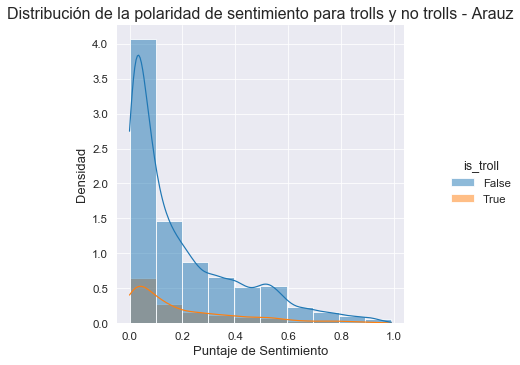

In [5]:
sns.set_style('darkgrid')
sns.set_context("paper", font_scale=1.3)

plt.figure(figsize=(12, 9))
g = sns.displot(df_arauz_tag, x="sentiment_sc", bins=10,
                hue="is_troll", stat="density", kde=True)
plt.title('Distribución de la polaridad de sentimiento para trolls y no trolls - Arauz', fontsize=16)
plt.ylabel("Densidad", fontsize=13)
plt.xlabel("Puntaje de Sentimiento", fontsize=13)
plt.close(1)
plt.show()

#### _Null Data Analysis_
> Los datos nulos que se muestran a continuacion se deben a que no fueron "retwiteados", es decir, `14544` son tweets originales a secas que no fueron respondidos por nadie

In [6]:
df_arauz_tag.isnull().sum().reset_index().rename(columns={'index':'columna', 0:'datos nulos'}).style

,columna,datos nulos
0,created_at,0
1,favorite_count,0
2,full_text,0
3,id_str,0
4,metadata.iso_language_code,0
5,retweeted_status.created_at,14544
6,retweeted_status.full_text,14544
7,user.created_at,0
8,user.favourites_count,0
9,user.followers_count,0


In [7]:
def larger_axlim( axlim ):
    """ argument axlim expects 2-tuple 
        returns slightly larger 2-tuple """
    axmin,axmax = axlim
    axrng = axmax - axmin
    new_min = axmin
    new_max = axmax + 0.05 * axrng
    return new_min,new_max

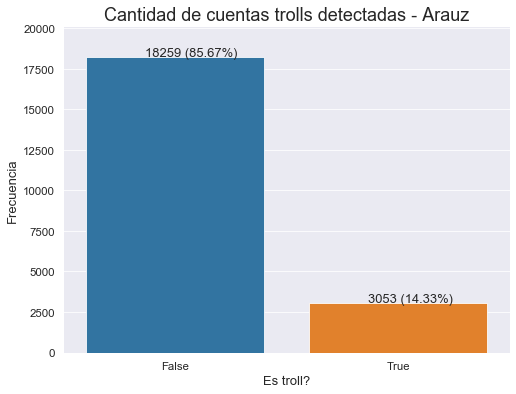

In [8]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="is_troll", data=df_arauz_tag)
plt.title('Cantidad de cuentas trolls detectadas - Arauz', fontsize=18)
plt.ylabel('Frecuencia', fontsize=13)
plt.xlabel('Es troll?', fontsize=13)

totalsize = df_arauz_tag['is_troll'].value_counts().sum()
ax.set_ylim(larger_axlim( ax.get_ylim()))

for p in ax.patches:
        ax.text(p.xy[0] + p.get_width()/3, p.xy[1] + p.get_height()+50, 
                str(round(p.get_height(), 3)) + " (" + 
                str(round(p.get_height()/totalsize*100,2)) + "%)", fontsize=13) 

plt.show();

#### _Podemos observar que apenas el 15% de los tweets recolectados provienen de cuentas trolls_

## **4.3.&emsp; Positive/Negative/Neutral Sentiment Analysis**
>Para este paso...

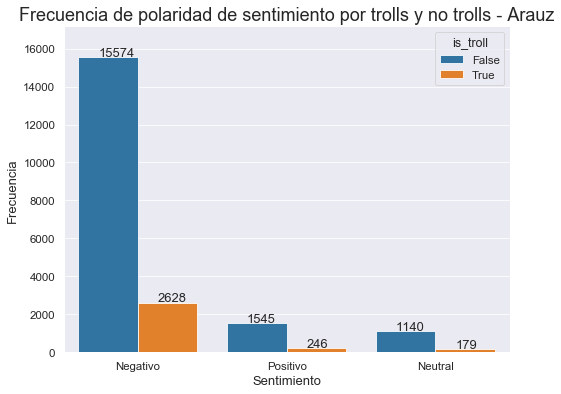

In [9]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="sentiment_tag", hue="is_troll", data=df_arauz_tag)

plt.title('Frecuencia de polaridad de sentimiento por trolls y no trolls - Arauz', fontsize=18)
plt.ylabel('Frecuencia', fontsize=13)
plt.xlabel('Sentimiento', fontsize=13)

ax.set_ylim(larger_axlim( ax.get_ylim()))

for p in ax.patches:
        ax.text(p.xy[0] + p.get_width()/3, p.xy[1] + p.get_height()+50, 
                str(round(p.get_height(), 3)), fontsize=13) 

plt.show();

#### _Debido a la cantidad de tweets recolectados, se debe hacer un resampling de lo obtenido con el fin de que la informacion pueda ser representada de la mejor manera. Se decide hacer una media del `sentiment score` cada 3 horas para poder graficar la serie de tiempo_

In [10]:
# Discarting trolls
arauz = df_arauz_tag[df_arauz_tag['is_troll']==False].resample('3H', 
                                                               on='created_at', 
                                                               offset='00Min00s').sentiment_sc.mean()
arauz_time_series = pd.DataFrame({'created_at':arauz.index, 'sentiment_sc':arauz.values})
mean_arauz = arauz_time_series['sentiment_sc'].mean()

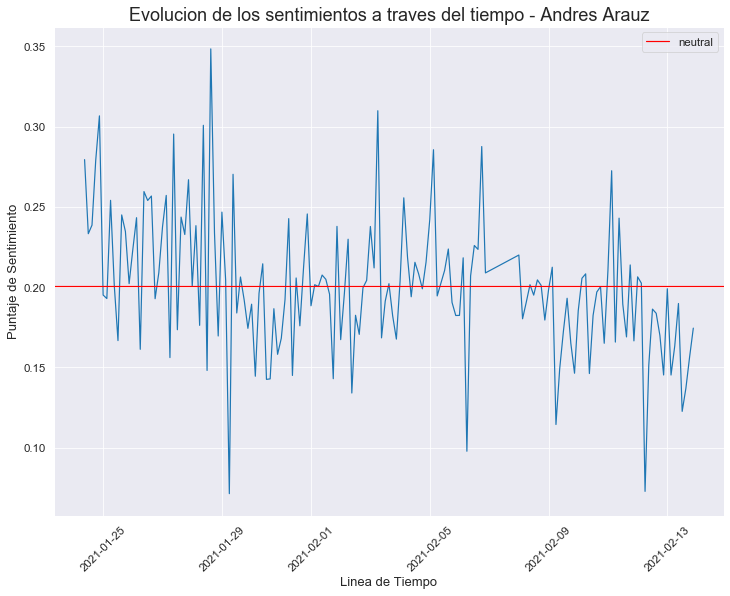

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 9))
ax = sns.lineplot(x="created_at", y="sentiment_sc", data=arauz_time_series)
plt.title('Evolucion de los sentimientos a traves del tiempo - Andres Arauz', fontsize=18)
plt.ylabel('Puntaje de Sentimiento', fontsize=13)
plt.xlabel('Linea de Tiempo', fontsize=13)
plt.xticks(rotation=45)
ax.axhline(mean_arauz,color='red',label='neutral')
ax.legend()
plt.show()

#### _Ahora se procede a realizar el mismo analisis por semanas_

In [12]:
arauz_time_series.set_index(arauz_time_series['created_at'], inplace=True)

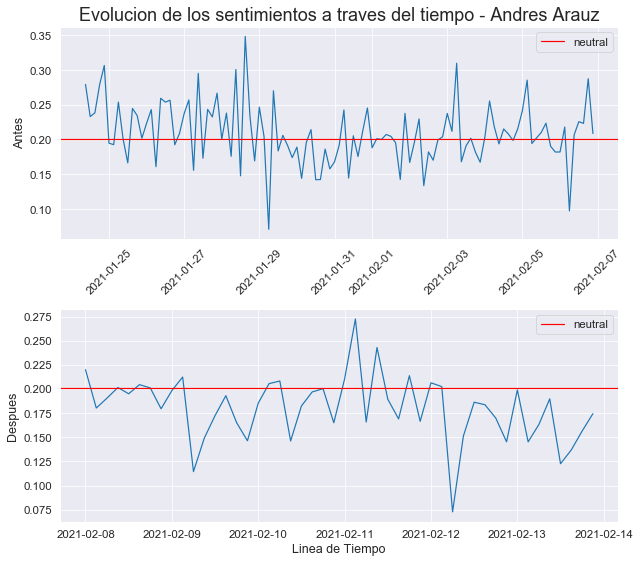

In [13]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(9,8))

sns.lineplot(x="created_at", y="sentiment_sc", estimator='mean', 
                  data=arauz_time_series['2021-01-24':'2021-02-6'], ax=ax1)
ax1.set_title('Evolucion de los sentimientos a traves del tiempo - Andres Arauz', fontsize=18)
ax1.set_xlabel("")  # remove y label, but keep ticks
ax1.set_ylabel("Antes")
ax1.axhline(mean_arauz,color='red',label='neutral')
ax1.legend()

sns.lineplot(x="created_at", y="sentiment_sc", estimator='mean', 
                  data=arauz_time_series['2021-02-8':'2021-02-13'], ax=ax3)
ax3.set_xlabel("Linea de Tiempo") 
ax3.set_ylabel("Despues")
ax3.axhline(mean_arauz,color='red',label='neutral')
ax3.legend()

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
fig.tight_layout()
plt.show()

#### _En el analisis por semanas se puede observar que a finales de enero el candidato Andres Arauz tuvo algo de apoyo en las redes sociales, y  a inicios de febrero comenzo a recibir negatividad. Luego de las elecciones el panorama se observa negativo/neutral para el candidato, esto podria ser por causa de la segunda vuelta_

## **4.3.&emsp; Analisis de Nube de Palabras**
>Para este paso...

In [33]:
def stopword_removal(text):
    text = text.lower() # lowercase text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [34]:
stopwords_ = stopwords.words('spanish')
STOPWORDS = set(stopwords_)
df_arauz_tag["full_text"] = df_arauz_tag["full_text"].apply(stopword_removal)

Sentiment: Positivo


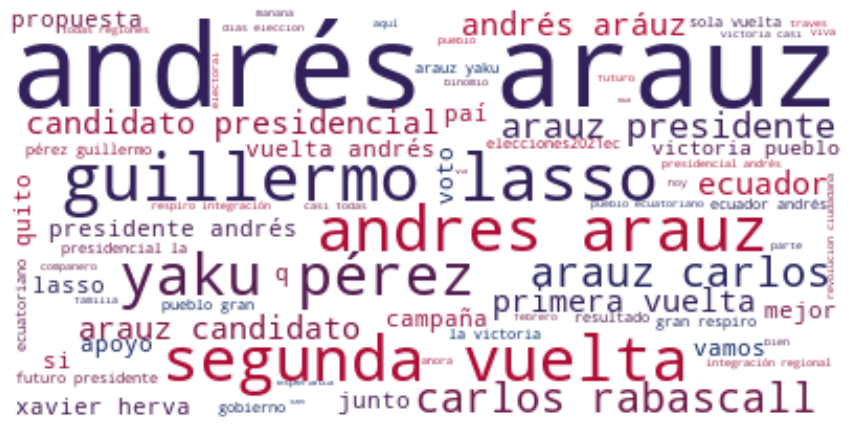

Sentiment: Negativo


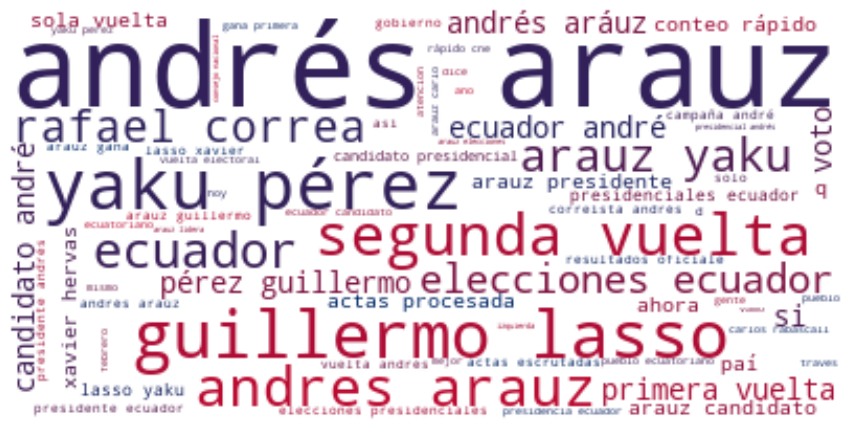

In [38]:
arauz_mask = np.array(Image.open('../src/rafita.png'))

result = df_arauz_tag[df_arauz_tag['is_troll']==False][['full_text', 'sentiment_tag']]

colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


for sent in ['Positivo', 'Negativo']:
    s=result[result.sentiment_tag==sent]
    text=s['full_text'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=70, max_words=70, random_state=42,
                          collocations=True, colormap=cmap, background_color="white").generate(text)
    
    print('Sentiment: {}'.format(sent))
    
    plt.figure(figsize=(15,15) )
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

#### _En el analisis_